In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**leia os dados `employee`**

In [3]:
from pycaret.datasets import get_data

In [4]:
df = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [34]:
# df.to_csv('employee.csv', index=False)
df = pd.read_csv('employee.csv')

In [35]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


**Crie um histograma de `average montly hours` por salario no seaborn**

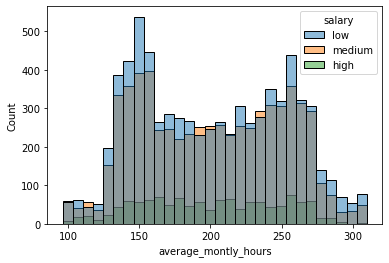

In [6]:
sns.histplot(data=df, x='average_montly_hours', hue='salary');

**Crie um grafico de barras com as frequencias de cada departamento no seaborn**

<AxesSubplot:xlabel='count', ylabel='department'>

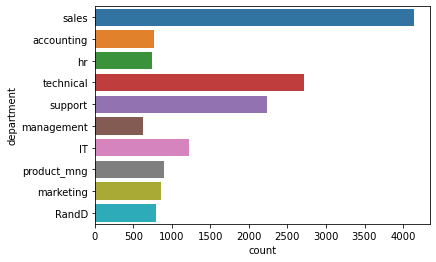

In [7]:
sns.countplot(data=df, y='department')

**Crie um gráfico de dispersão de nivel de satisfacao por ultima avaliacao no seaborn**

<AxesSubplot:xlabel='satisfaction_level', ylabel='last_evaluation'>

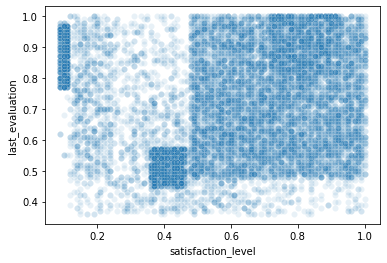

In [8]:
sns.scatterplot(data=df, x='satisfaction_level', y='last_evaluation', 
                alpha=0.1)

**Crie uma tabela de frequencia de salario por departamento e visualize no heatmap com o seaborn**

In [10]:
df['salary'].dtype

dtype('O')

In [11]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [12]:
df['salary'] = pd.Categorical(df['salary'],
                              categories=['low', 'medium', 'high'],
                              ordered=True)

In [13]:
df['salary'].dtype

CategoricalDtype(categories=['low', 'medium', 'high'], ordered=True)

In [14]:
freq = pd.crosstab(df['salary'], df['department'])
freq

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147
high,83,51,74,45,225,80,68,269,141,201


<AxesSubplot:xlabel='department', ylabel='salary'>

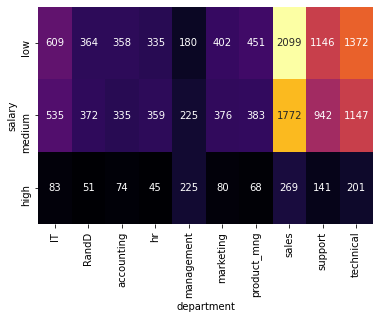

In [17]:
sns.heatmap(freq, annot=True, fmt='.4g', cmap='inferno', cbar=False)

**Crie um malha 2x2 e plote cada um dos quadrantes cada um dos 4 gráficos criados acima**

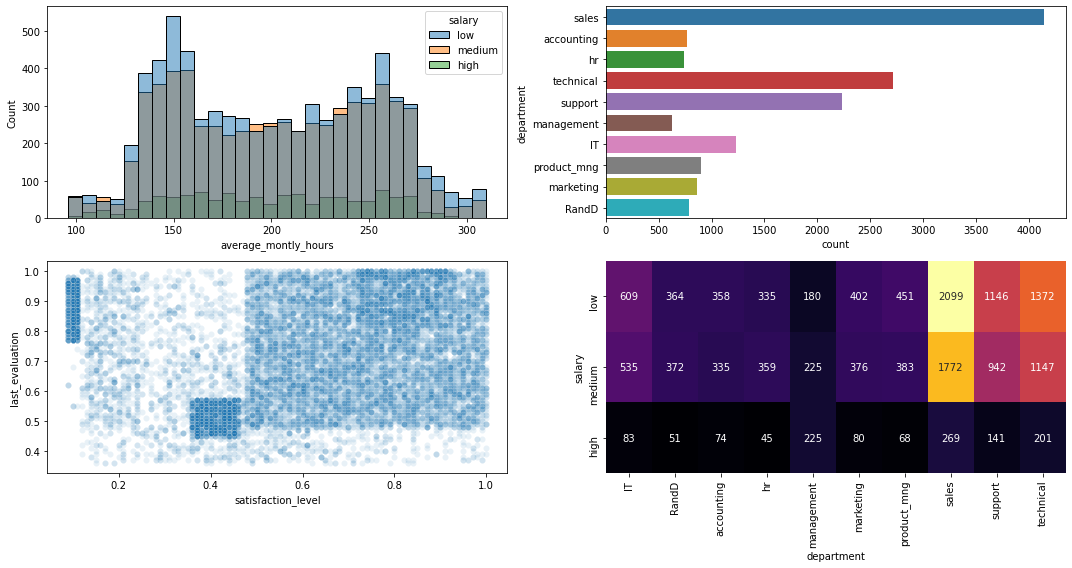

In [18]:
_, ax = plt.subplots(2, 2, figsize=(15, 8))

sns.histplot(data=df, x='average_montly_hours', hue='salary', ax=ax[0, 0])
sns.countplot(data=df, y='department', ax=ax[0, 1])
sns.scatterplot(data=df, x='satisfaction_level', y='last_evaluation', 
                alpha=0.1, ax=ax[1, 0])
sns.heatmap(freq, annot=True, fmt='.4g', cmap='inferno', cbar=False,
            ax=ax[1, 1])

plt.tight_layout();